# Using History (Markov Chain)

In rock-paper-scissors, players tend to have specific patterns, for example if they won two times in a row using the same move, they might continue using that move for the next game. Let's use this information to predict what the most likely move our opponent is going to make.

In the random player case, we assumed this probability to be
1/3 for all three moves. For this smarter player, we keep a table of frequencies for how many times our opponent has used a sequence of moves.

For every new turn `t` we assume our opponent is going to use the most likely move according to the frequencies `F_t-1` that we observed so far, and make our counter-move accordingly. After the turn we use the opponent's move to update our frequency table to `F_t`.

This smarter player is a basic Markov chain model.

In [2]:
import sys
import os
from tqdm import tqdm

%load_ext autoreload
%autoreload 2

sys.path.append(os.path.abspath(os.path.join('..')))

from rps.state.tournament import play_tournament
from rps.players.weighted import Weighted
from rps.players.markov import Markov
from rps.players.ensemble import Ensemble

We expect our Markov player to not beat the random player, because there is no pattern to be learnt from the random player's behaviour.


Randy               vs              Mark



████████████████████████████████████████


Tournament Stats:
Randy              Draw             Mark
33.60            32.87             33.53
----------------------------------------



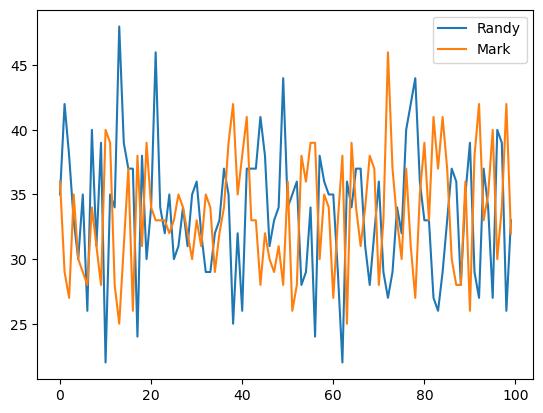

In [7]:
randy = Weighted(name="Randy")
mark = Markov(name="Mark")

play_tournament(randy, mark, num_games=100, num_rounds=100, print_plot=True)

A Markov player should consistently beat a weighted random player, who is more likely to use certain moves than others.


Scissorhands           vs           Mark



████████████████████████████████████████


Tournament Stats:
Scissorhands          Draw          Mark
10.36             9.91             79.73
----------------------------------------



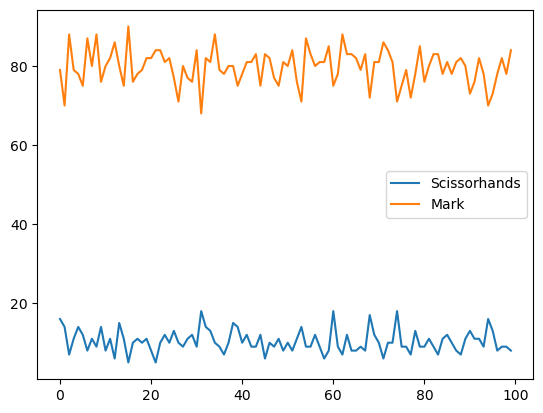

In [8]:
scissorhands = Weighted(name="Scissorhands", weights=[1,1,8])
mark = Markov(name="Mark", num_moves=2)

play_tournament(scissorhands, mark, num_games=100, num_rounds=100, print_plot=True)

If the Markov player tuned their behaviour to counter a scissors-heavy strategy, can it then adapt when the opponent changes their strategy to prefer rock?


THEROCK           vs           Same Mark



████████████████████████████████████████


Tournament Stats:
THEROCK          Draw          Same Mark
10.07            26.13             63.80
----------------------------------------



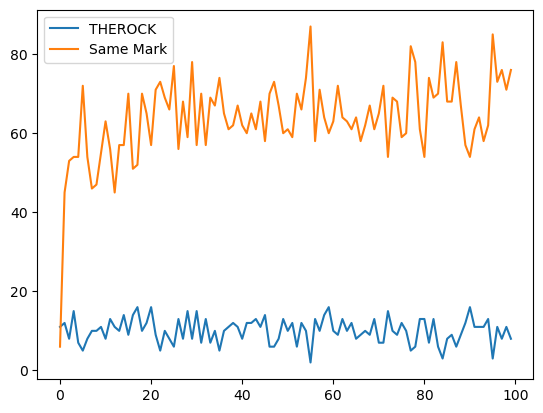

In [9]:
# Reusing the same Mark.
mark.name = 'Same Mark'
therock = Weighted(name="THEROCK", weights=[8,1,1])
play_tournament(therock, mark, num_games=100, num_rounds=100, print_plot=True)

Suppose the opponent is a rabble consisting of several heavily biased players. Every turn they random decide who gets to play against Mark. Can Mark keep up with their strategy?


Rabble              vs              Mark



████████████████████████████████████████


Tournament Stats:
Rabble             Draw             Mark
33.50            33.77             32.73
----------------------------------------



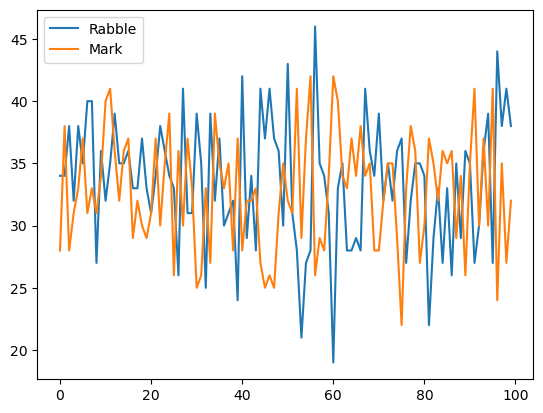

In [5]:
scissorhands = Weighted(name="Scissorhands", weights=[1,1,8])
therock      = Weighted(name="THEROCK",      weights=[8,1,1])
paperman     = Weighted(name="Paper",        weights=[1,8,1])
rabble = Ensemble(name="Rabble", players=[scissorhands, therock, paperman])
mark = Markov(name="Mark", num_moves=2)

play_tournament(rabble, mark, num_games=100, num_rounds=100, print_plot=True)

No. Because together the rabble essentially is the random player.

What if the rabble prefers rocks and scissors, but no paper?


Rabble              vs              Mark



████████████████████████████████████████


Tournament Stats:
Rabble             Draw             Mark
26.89            28.36             44.75
----------------------------------------



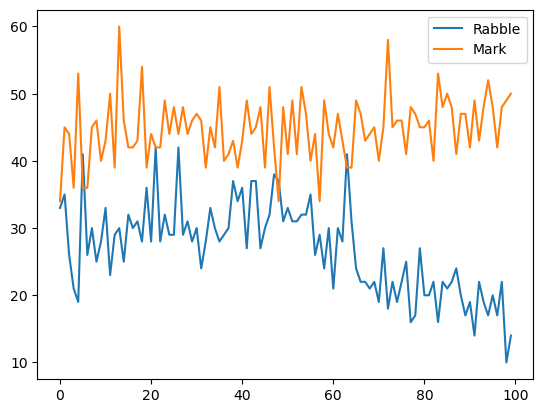

In [6]:
rabble = Ensemble(name="Rabble", players=[scissorhands, therock])
mark = Markov(name="Mark", num_moves=2)

play_tournament(rabble, mark, num_games=100, num_rounds=100, print_plot=True)

In this case there the rabble is not the random player, and Mark was able to play something from their play.

A Markov player with a longer window should also outperform one with a shorter
window.


Mark 2             vs             Mark 6



████████████████████████████████████████


Tournament Stats:
Mark 2            Draw            Mark 6
31.64            27.85             40.51
----------------------------------------



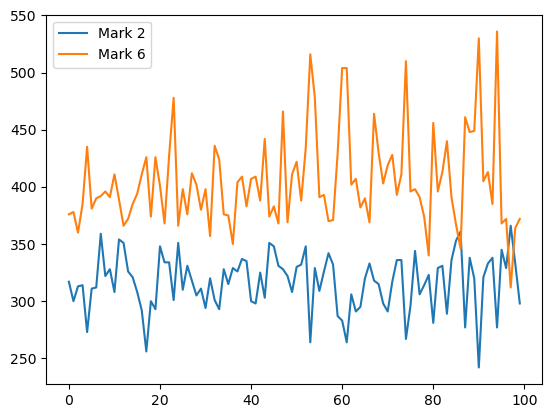

In [7]:
mark1 = Markov(name="Mark 2", num_moves=2)
mark2 = Markov(name="Mark 6", num_moves=6)
play_tournament(mark1, mark2, num_games=100, num_rounds=1000, print_plot=True)